<a href="https://colab.research.google.com/github/yatzirirain/Portfolio/blob/main/Solucion_numerica_schrondinger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 7. Solución númerica de la Ecuación de Schrödinger
### Yatziri Irain Venado Peña

---



# **Estados ligados cuánticos en un potencial arbitrario.**

Una partícula cuántica en un estado estacionario de energía definida E se encuentra ligada por un potencial 1D. Su función de onda se determina por la ecuación de Schrödinger independiente del tiempo
$$\frac{d ^2 \psi (x)}{dx^2}-\frac{2m}{ħ^2}V(x)\psi(x) = κ ^2 \psi (x),~~~~~~~~~~κ^2=-\frac{2m}{ħ^2}E$$
Cuando la partícula está ligada, tenemos que está confinada a cierta
región *finita* del espacio, por lo que $\psi (x)$ es normalizable. Esto nos dice que la energía debe ser negativa para que $\psi (x)$ decaiga exponencialmente cuando $x \rightarrow \pm \infty$:
$$f(x)= \left\{ \begin{array}{lcc}
             e^{-\kappa x} &   \mathrm{cuando } &x \rightarrow + \infty  \\
             \\ e^{+\kappa x} &  \mathrm{cuando } &x \rightarrow - \infty \\
             \end{array}
   \right.$$
Aunque la ecuación puede resolverse con algún método numérico (Runge-
Kutta, por ejemplo), el extra aquí es que también debemos tener que la solución $\psi (x)$ debe satisfacer las condiciones de frontera anteriores.

Esta condición adicional convierte al problema de la EDO en un problema de eigenvalores en el cual existe solución solo para ciertos valores del eigenvalor E. La solución, si existe, se sigue de encontrar una energía permitida, resolver la ecuación y después variar la energía como parte de un problema de prueba y error (búsqueda de raíces) para la
función de onda que satisfaga las condiciones de frontera. 

> Primero escribimos la ecuacion de Schrödinger en forma estandar $\frac{d \mathbf{y}(x)}{dx}=\mathbf{f}(t,\mathbf{y})$
>
>Definimos: 
$$y^{(0)}(x)=\psi(x),~~~~y^{(1)}(x)=\frac{d \psi(x)}{dx}$$
Entonces
$$\frac{d y^{(0)}(x)}{dx}=y^{(1)}(x)$$
$$\frac{d y^{(1)}(x)}{dx}=\left(\kappa^2+\frac{2m}{\hbar}V(x)\right) y^{(0)}(x)$$
Sea $a=\frac{2m}{\hbar}$
$$f^{(0)}=y^{(1)}(x)$$
$$f^{(1)}=\left(V(x)-E\right) y^{(0)}(x)$$
Ya que tenemos el sistema simultaneo de EDOs de primer orden, aplicamos el método de Runge-Kutta de cuarto orden para integrar la funciones.
>
>Se calculan dos soluciones $\psi_L$ y $\psi_R$ que conformaran la funcion de onda.
$$\psi(x)= \left\{ \begin{array}{lcc}
             \psi_L(x)  &x<x_m  \\
             \\ \psi_R(x) &  x>x_m\\
             \end{array}
   \right.$$
>Donde $x_m$ es el radio de pegado donde se unen las funciones que calculamos como soluciones y esta dentro de la region del potencial.
>
>Iniciamos el calculo de $\psi_L$ en el extremo izquierdo de nuestros valores para la posicion $x=-X$, aqui $V(-X)\approx 0$, asi que nuestras condiciones iniciales son:
$$\psi_L^{(0)}(-X)=e^{-\kappa X}$$
$$\psi_L^{(1)}(-X)=-\kappa\psi_L^{(0)}(-X)$$
Por otro lado, iniciamos el calculo de $\psi_R$ en el extremo derecho de nuestros valores para la posicion $x=X$, aqui igualmeente $V(X)\approx 0$, asi que nuestras condiciones iniciales son:
$$\psi_D^{(0)}(X)=e^{-\kappa X}$$
$$\psi_D^{(1)}(X)=\kappa\psi_L^{(0)}(X)$$

Una vez se calcularon las dos funciones con el metodo de Runge-Kutta, se normalizo $\psi_L(x)$ para que encajara con $\psi_L(x)$ en $x_m$.

Para que la probabilidad y la corriente sean continuas en $x = x_m$,
$\psi(x)$ y $\psi'(x)$ deben ser continuas ahí. Una condición que combina ambas y es independiente de la normalización es requerir que la
derivada logarítmica $\frac{\psi'(x)}{\psi(x)}$ sea continua.

Para medir cuanto difieren las derivadas logarítmicas en $x_m$, se define la función `Delta(E)`.

Finalmente se usa el método de la bisección para hallar un valor para E talque `Delta(E)`=0 dentro de cierta tolerancia.

Para realizar los calculos se tomo un potencial cuadrado finito de longitud 2d.
$$V(x)= \left\{ \begin{array}{lcc}
             -V_0  &|x|\leq d  \\
             \\ 0 &  |x|> d \\
             \end{array}
   \right.$$

Energia= -14.9720843764355


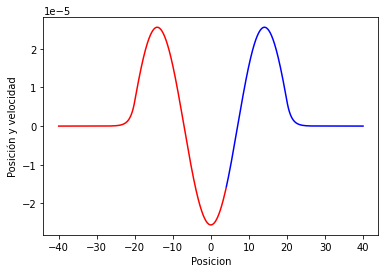

In [ ]:
from pylab import *
# Definición de constantes
N=1000           # Número de pasos
X=40             # Extremo de posicion de la simulacion
im=100           # radio de pegado
h=X/float(N-1)   # Paso de la posicion
m=940            # masa de la particula en eV/c*c
hc=197.33        # h_barra*c  
a=(2*m)/(hc**2)  # constante
E=-15.0          # energia
k=-a*E           # vector de onda

#Definimos funcion de potencial
#POZO CUADRADO FINITO
d=20              #Mitad del ancho del pozo del potencial en fm
V0=-16           #Valor del potencial dentro del pozo
def V(x):
  if abs(x)>d:
    return 0
  else:
    return V0

# Generamos posiciones igualmente espaciadas 
posicion=linspace(-X,X,2*N+1)

# Generamos un arreglo de 2Nx2 para almacenar SOL IZQUIERDA                                             
yL=zeros([2*N,2])
# Tomamos los valores del estado inicial de la solucion izq
yL[0,0]=exp(-k*X)   
yL[0,1]=sqrt(k)*yL[0,0]

# Generamos un arreglo de 2Nx2 para almacenar SOL DERECHA                                            
yR=zeros([2*N,2])
# Tomamos los valores del estado inicial de la solucion der
yR[2*N-1,0]=exp(-k*X)  
yR[2*N-1,1]=sqrt(k)*yR[2*N-1,0]


#for j in range(N):
#  print(j,posicion[j])

# Definimos nuestra ecuación diferencial
def EDO(posicion,estado,E):
    f0=estado[1]
    f1=a*(V(posicion)-E)*estado[0]
    return array([f0,f1])

# Método de Runge-Kutta de 4 orden para resolver numéricamente la EDO 
def rk4Algor(x,h,N,y,f,E):
    k1=np.zeros(N); k2=np.zeros(N); k3=np.zeros(N); k4=np.zeros(N)
    k1 = h*f(x,y,E)                             
    k2 = h*f(x+h/2.,y+k1/2.,E)
    k3 = h*f(x+h/2.,y+k2/2.,E)
    k4 = h*f(x+h,y+k3,E)
    y=y+(k1+2*(k2+k3)+k4)/6.
    return y 


def Delta(E):
  # Calculo solucion izquierda
  for j in range(0,N+im):
    yL[j+1]=rk4Algor(posicion[j],h,N,yL[j],EDO,E)
  # Calculo solucion derecha
  for j in range(2*N-1,N+im,-1):
    yR[j-1]=rk4Algor(posicion[j],h,N,yR[j],EDO,E)
  #Condicion de continuidad
  Dizq=yL[N+im,1]/yL[N+im,0]        #Derivada log izquierda
  Dder=yR[N+im,1]/yR[N+im,0]        #Derivada log derecha
  return (Dizq-Dder)/(Dizq+Dder)

#Metodo de biseccion para encontrar E
Eps=0.001
Nmax=100         #max iteraciones biseccion
Emax=1.1*E
Emin=E/1.1
for i in range (Nmax):
  E=(Emax+Emin)/2
  if(Delta(Emax)*Delta(E)>0):
    Emax=E
  else:
    Emin=E
  if(abs(Delta(E))<Eps): break

print('Energia=',E)

# Calculo solucion izquierda
for j in range(0,N+im):
#  print(j,y[j])
  yL[j+1]=rk4Algor(posicion[j],h,N,yL[j],EDO,E)

# Calculo solucion derecha
for j in range(2*N-1,N+im,-1):
    yR[j-1]=rk4Algor(posicion[j],h,N,yR[j],EDO,E)

#Normalizamos Psi izquierda para que encaje con Psi derecha
Norm=yR[N+im,0]/yL[N+im,0]   #constante se normalizacion
for j in range(0,N+im+1):
  yL[j]=yL[j]*Norm
 
# Datos para graficar
xdatos=[yL[j,0] for j in range(0,N+im)]           #Psi izquierda
zdatos=[yR[j,0] for j in range(2*N-1,N+im,-1)]    #Psi derecha
x_izq=[posicion[j] for j in range(0,N+im)]
x_der=[posicion[j] for j in range(2*N-1,N+im,-1)]

#Grafica potencial
Vdatos=[V(posicion[j]) for j in range(N)]

plot(x_izq,xdatos,'-r')
plot(x_der,zdatos,'-b')
#plot(posicionn,xddatos,'-r')
#plot(posicionn,Vdatos,'-b')
xlabel('Posicion')
ylabel('Posición y velocidad')
show()